# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 1: Predicting the Percentage of an student based on number of hours studied and also to predict the score of student who  studied for 9.25 Hours 

***

Importing all the necessarry libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

***

Getting the Data-set

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student = pd.read_csv(url)         # Reading from the csv file and storing it in student variable

In [3]:
student.head()                     # Displaying the first few elements of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student.info()                      # Checking for missing or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student.describe()                  # Displaying the mean, std, count, min, max values

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


***

Plotting the data in a graph format

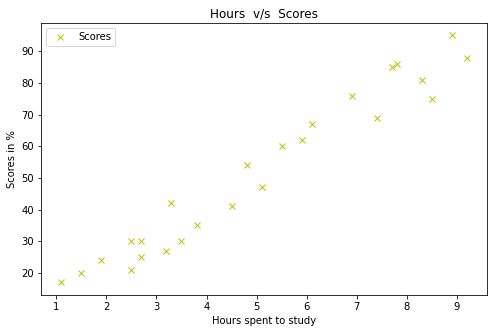

In [6]:
student.plot(x='Hours', y='Scores', style='xy', figsize=(8,5))
mpl.title('Hours  v/s  Scores')
mpl.xlabel('Hours spent to study')
mpl.ylabel('Scores in %')
mpl.show()

***

Splitting the data in Train-set and Test-set with help of sklearn

In [7]:
# train_test_split method splits the data randomly into test and train sets
train_set, test_set = train_test_split(student, test_size=0.1, random_state=42)

In [8]:
len(train_set)                      # Checking the length of train dataset

22

In [9]:
len(test_set)                       # Checking the length of test dataset

3

***

Seperating the inputs and outputs

In [10]:
student_x = train_set.drop("Scores", axis=1)
student_y = train_set["Scores"].copy()

***

Using Linear Regression from sklearn to fit our data

In [11]:
lg = LinearRegression()           # Creating a Logistic Regression variable
lg.fit(student_x, student_y)

LinearRegression()

Visualization of the trained model

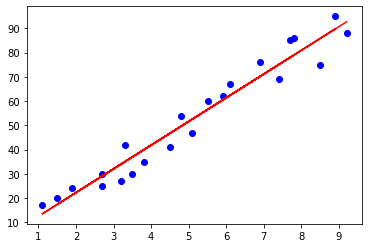

In [12]:
mpl.scatter(student_x,student_y, color='b')
mpl.plot(student_x, lg.coef_*student_x + lg.intercept_, color='r')
mpl.show()

From the above plot it's clear that the slope of the regression is positive, now we can predict the values on our testset.

***

Using the Testset to test our trained model

In [13]:
# Seperating the input and output from testset
test_x = test_set.drop("Scores", axis=1)  
test_y = test_set["Scores"].copy()

In [14]:
lg.predict(test_x)                  # Predecting the values

array([83.89727817, 27.15092273, 27.15092273])

In [15]:
test_y                              # Original values

8     81
16    30
0     21
Name: Scores, dtype: int64

In [16]:
# Putting the above result in a nice format
pd.DataFrame({'Actual Values':test_y, 'Predicted Values':lg.predict(test_x)})

,Actual Values,Predicted Values
8,81,83.897278
16,30,27.150923
0,21,27.150923


***

Predicting score for 9.25 hours of study

In [17]:
predict_value = np.array([9.25])   # Converting the input into numpy array
studied = predict_value.reshape(-1,1)  
lg.predict(studied)

array([93.19193983])

In [18]:
print('If a student studied for 9.25 hours/day then the score is: ',lg.predict(studied)[0])

If a student studied for 9.25 hours/day then the score is:  93.19193983315074


***

Using Mean Absolute Error from sklearn to find the error between the predicted values and the original values

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(test_y, lg.predict(test_x))

3.9657593887812133

In [21]:
print('Mean Absolute Error for our trained model is: ',mean_absolute_error(test_y, lg.predict(test_x)))

Mean Absolute Error for our trained model is:  3.9657593887812133


***

Thank You :)